# Ames Housing Saleprice

## Problem Statement

Create a regression model where we are able to see what features affects the price of the house at sales the most.

## Executive Summary

### Contents:
- [7. Model_Benchmarks](#7.-Model-Benchmarks)
- [8. Model_Tuning](#8.-Model-Tuning)


Links:
[Kaggle challenge link](https://www.kaggle.com/c/dsi-us-6-project-2-regression-challenge/data)

# 7. Model Benchmarks

In [1]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
plt.style.use('ggplot')
from IPython.display import display
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [2]:
# Importing cleaned dataset for Pre Processing
df = pd.read_csv("../datasets/AHD_PP_FE.csv", na_filter=False)
df_train = pd.read_csv('../datasets/train.csv')
df_test = pd.read_csv('../datasets/test.csv')

df.shape, df_train.shape, df_test.shape

((2879, 144), (2051, 81), (879, 80))

In [3]:
df_train_rows = df_train['Id'].tolist()
df_test_rows = df_test['Id'].tolist()

df_train = df.loc[df['Id'].isin(df_train_rows)]
df_test = df.loc[df['Id'].isin(df_test_rows)]

df_train.shape ,df_test.shape

((2000, 144), (879, 144))

In [4]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2000.0,1475.979500,844.800305,1.000000,753.750000,1483.500000,2199.250000,2930.000000
Overall Qual,2000.0,0.006456,0.997723,-2.982135,-0.786525,-0.054655,0.677215,2.872824
Year Built,2000.0,0.009924,0.996805,-3.289376,-0.579026,0.092346,0.987507,1.285895
Year Remod/Add,2000.0,-0.006325,1.008573,-1.637940,-0.966355,0.424785,0.952459,1.240281
Mas Vnr Area,2000.0,-0.035627,0.910797,-0.585875,-0.585875,-0.585875,0.325333,4.232293
Exter Qual,2000.0,0.006679,1.003603,-2.454760,-0.688388,-0.688388,1.077984,2.844356
Bsmt Qual,2000.0,0.010384,0.989178,-3.910573,-0.533349,0.592393,0.592393,1.718134
Total Bsmt SF,2000.0,0.003451,0.989106,-2.543577,-0.607085,-0.122198,0.642127,3.896314
1st Flr SF,2000.0,-0.000885,0.979896,-2.127254,-0.742365,-0.162756,0.632921,4.331446
Gr Liv Area,2000.0,-0.015499,0.959179,-2.197885,-0.751898,-0.101414,0.492323,4.222886


## 7.1 Train Split Test

In [5]:
# prepare for train split test
# test the unseen data with training test
# see which model works best
# check if data is overfitting or underfitting
# do adjustments

In [6]:
col_keys = df.drop(columns = ['Id','SalePrice']).keys()
col_keys

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Bsmt Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       ...
       'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con', 'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw', 'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD '], dtype='object', length=142)

In [7]:
y = df_train['SalePrice']
X = df_train[col_keys]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [9]:
print('X_train shape: ' + str(X_train.shape))
print('X_test shape: ' + str(X_test.shape))
print('y_train shape: ' + str(y_train.shape))
print('y_test shape: ' + str(y_test.shape))

X_train shape: (1500, 142)
X_test shape: (500, 142)
y_train shape: (1500,)
y_test shape: (500,)


## 7.1.1 Linear

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Train Score(Lr): " + str(lr.score(X_train,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train, y_train, cv = 5).mean()))

Train Score(Lr): 0.9183402370115139
Test Score(Lr): -5633328292015047.0
Test Data Estimated score(Lr) -7.054338901975156e+19


In [13]:
print("Train MSE(Lr) " + str(mean_squared_error(y_train, lr.predict(X_train))))
print('Test MSE(Lr) ' + str(mean_squared_error(y_test, lr.predict(X_test))))
                              
print('Test Data Estimated MSE(Lr) ' + str(-cross_val_score(lr, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean()))

Train MSE(Lr) 411655483.736
Test MSE(Lr) 2.94021937313836e+25
Test Data Estimated MSE(Lr) 3.4084245171992475e+29


### 7.1.1 comments 
- Terrible result, models is severely overfitted resulting in a negative r2 value
- Will use Ridge, Lasso and Elastic model to regularize data

## 7.1.2 Ridge

In [14]:
ridge = RidgeCV(alphas = np.linspace(0.1,10,100))

In [15]:
ridge.fit(X_train, y_train);

In [16]:
ridge.alpha_

3.8000000000000003

In [17]:
print("Train Score(L1): " + str(ridge.score(X_train,y_train)))
print("Test Score(L1): " + str(ridge.score(X_test,y_test)))
print('Test Data Estimated score(L1) ' + str(cross_val_score(ridge, X_train, y_train, cv = 5).mean()))

Train Score(L1): 0.9148894977682447
Test Score(L1): 0.9034172678455475
Test Data Estimated score(L1) 0.8947197014144015


In [18]:
print("Train RMSE(L1) " + str(np.sqrt(mean_squared_error(y_train, ridge.predict(X_train)))))
print('Test RMSE(L1) ' + str(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L1) ' + str(np.sqrt(-cross_val_score(ridge, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L1) 20713.54688261384
Test RMSE(L1) 22452.10580347417
Test Data Estimated RMSE(L1) 22920.87419440779


Ridge model is producing better results

# 7.1.3 Lasso

In [19]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100))

In [20]:
lasso.fit(X_train, y_train);

C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1764351728.9753418, tolerance: 590057229.7638786
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 923361433.0743408, tolerance: 605184409.2566261
  tol, rng, random, positive)


In [21]:
lasso.alpha_

10.0

In [22]:
print("Train Score(L2): " + str(lasso.score(X_train,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train, y_train, cv = 5).mean()))

Train Score(L2): 0.9178079840696853
Test Score(L2): 0.9029582186846993


C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4889399564.351624, tolerance: 458898901.5303297
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4019766053.642212, tolerance: 462099044.81699485
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1763668266.7658691, tolerance: 458548615.0400295
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

Test Data Estimated score(L2) 0.8937703320239407


In [23]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 20355.30955280816
Test RMSE(L2) 22505.39898799581


C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4889399564.351624, tolerance: 458898901.5303297
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4019766053.642212, tolerance: 462099044.81699485
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1763668266.7658691, tolerance: 458548615.0400295
  tol, rng, random, positive)
C:\Users\Sim Yi\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. Yo

Test Data Estimated RMSE(L2) 23039.214555850598


# 7.1.4 Elastic Net

In [24]:
elasticnet = ElasticNetCV(alphas = np.linspace(0.1,10,100))

In [25]:
elasticnet.fit(X_train, y_train);

In [26]:
elasticnet.alpha_

0.1

In [27]:
print("Train Score(EN): " + str(elasticnet.score(X_train,y_train)))
print("Test Score(EN): " + str(elasticnet.score(X_test,y_test)))
print('Test Data Estimated score(EN) ' + str(cross_val_score(elasticnet, X_train, y_train, cv = 5).mean()))

Train Score(EN): 0.8987501392925736
Test Score(EN): 0.8950201636391744
Test Data Estimated score(EN) 0.8880345325321244


In [28]:
print("Train RMSE(EN) " + str(np.sqrt(mean_squared_error(y_train, elasticnet.predict(X_train)))))
print('Test RMSE(EN) ' + str(np.sqrt(mean_squared_error(y_test, elasticnet.predict(X_test)))))
                              
print('Test Data Estimated RMSE(EN) ' + str(np.sqrt(-cross_val_score(elasticnet, X_train, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(EN) 22592.282618398567
Test RMSE(EN) 23407.78299041091
Test Data Estimated RMSE(EN) 23626.196849802567


- Slight differences from the 3 models
- Lasso does slightly better for its scoring
- will use Lasso model to eliminate features

# 8 Model Tuning

In [29]:
coef = pd.Series(lasso.coef_, index = X_train.columns)
coef.sort_values(ascending = False, inplace = True)
coef[coef > 0]

Neighborhood_GrnHill     112518.484542
Condition 2_PosN          50198.478307
Roof Matl_WdShngl         40091.508187
Condition 2_PosA          37982.743637
Neighborhood_NridgHt      34515.667805
Heating_Wall              24196.364854
Neighborhood_StoneBr      23953.055749
Gr Liv Area               20636.722890
Neighborhood_NoRidge      20448.718368
Garage Type_NA            19078.755875
Exterior 1st_AsphShn      16676.279705
Land Contour_HLS          16647.755056
Bldg Type_1Fam            14742.598615
Fireplace Total Value     14408.040908
Bldg Type_2fmCon          14329.026089
Condition 1_PosA          14327.490151
House Style_2.5Unf        14044.412051
Exterior 1st_CemntBd      13059.400027
Condition 1_PosN          12683.225368
Exterior 1st_BrkFace      12331.479655
Roof Matl_Membran         11557.852161
Neighborhood_Veenker      10980.774183
Overall Total Value        9408.206404
Total Bath                 9135.644903
Neighborhood_BrDale        8603.566923
Land Contour_Low         

In [30]:
gd_coef = coef[:50].keys()
len(gd_coef) #keeping values with high coef

50

In [31]:
X_train_filtered = X_train[gd_coef]
X_test_filtered = X_test[gd_coef]

In [32]:
lr = LinearRegression()
lr.fit(X_train_filtered, y_train)

LinearRegression()

In [33]:
print("Train Score(Lr): " + str(lr.score(X_train_filtered,y_train)))
print("Test Score(Lr): " + str(lr.score(X_test_filtered,y_test)))
print('Test Data Estimated score(Lr) ' + str(cross_val_score(lr, X_train_filtered, y_train, cv = 5).mean()))

Train Score(Lr): 0.9097879565260141
Test Score(Lr): 0.897834401391918
Test Data Estimated score(Lr) 0.895967016700656


In [34]:
print("Train RMSE(Lr) " + str(np.sqrt(mean_squared_error(y_train, lr.predict(X_train_filtered)))))
print('Test RMSE(Lr) ' + str(np.sqrt(mean_squared_error(y_test, lr.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(Lr) ' + str(np.sqrt(-cross_val_score(lr, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(Lr) 21325.300285944697
Test RMSE(Lr) 23091.90056719478
Test Data Estimated RMSE(Lr) 22819.339305905793


- Tried with 25, 30, 40, 50, 55 features for test, 50 features returns the best results
- Trying with Lasso model

In [35]:
lasso = LassoCV(alphas = np.linspace(0.1,10,100))

In [36]:
lasso.fit(X_train_filtered, y_train);

In [37]:
lasso.alpha_

0.7000000000000001

In [38]:
print("Train Score(L2): " + str(lasso.score(X_train_filtered,y_train)))
print("Test Score(L2): " + str(lasso.score(X_test_filtered,y_test)))
print('Test Data Estimated score(L2) ' + str(cross_val_score(lasso, X_train_filtered, y_train, cv = 5).mean()))

Train Score(L2): 0.9097867283287627
Test Score(L2): 0.8979375404942495
Test Data Estimated score(L2) 0.8957198451541748


In [39]:
print("Train RMSE(L2) " + str(np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_filtered)))))
print('Test RMSE(L2) ' + str(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_filtered)))))
                              
print('Test Data Estimated RMSE(L2) ' + str(np.sqrt(-cross_val_score(lasso, X_train_filtered, y_train, 
                                                            cv = 5, scoring = 'neg_mean_squared_error').mean())))

Train RMSE(L2) 21325.445452737513
Test RMSE(L2) 23080.24165595301
Test Data Estimated RMSE(L2) 22847.257291404436


# 8.1 Further Model tuning

- Polynomial features, try to reduce RMSE
- try to remove more values, reducing variance

In [63]:
coef_sort = [i for i in (gd_coef.sort_values())] # creating list in alphabetical order to see relationship
coef_sort

['1st Flr SF',
 'Bldg Type_1Fam',
 'Bldg Type_2fmCon',
 'Condition 1_Norm',
 'Condition 1_PosA',
 'Condition 1_PosN',
 'Condition 2_PosA',
 'Condition 2_PosN',
 'Exter Qual',
 'Exterior 1st_AsphShn',
 'Exterior 1st_BrkFace',
 'Exterior 1st_CemntBd',
 'Exterior 1st_MetalSd',
 'Fireplace Total Value',
 'Garage Area',
 'Garage Cars',
 'Garage Total Value',
 'Garage Type_NA',
 'Gr Liv Area',
 'Heating_GasA',
 'Heating_Wall',
 'House Style_2.5Unf',
 'House Style_SFoyer',
 'Kitchen Qual',
 'Land Contour_HLS',
 'Land Contour_Low',
 'Lot Config_CulDSac',
 'Mas Vnr Area',
 'Neighborhood_BrDale',
 'Neighborhood_Crawfor',
 'Neighborhood_Greens',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Overall Qual',
 'Overall Total Value',
 'Roof Matl_Membran',
 'Roof Matl_WdShngl',
 'Roof Style_Hip',
 'Sale Type_ConLD',
 'Sale Type_New',
 'Sale Type_Oth

In [61]:
coef[:10] #checking top 10 highest coef

Neighborhood_GrnHill    112518.484542
Condition 2_PosN         50198.478307
Roof Matl_WdShngl        40091.508187
Condition 2_PosA         37982.743637
Neighborhood_NridgHt     34515.667805
Heating_Wall             24196.364854
Neighborhood_StoneBr     23953.055749
Gr Liv Area              20636.722890
Neighborhood_NoRidge     20448.718368
Garage Type_NA           19078.755875
dtype: float64

From the list above, some Categories can be seen. 
- Building type, 1Fam and 2Fmcon(single family or 2 family conversion)
- Condition 1 and 2, PosA and PosN(Adjecent or near to Positive off site feature -- park, greenbelt)
- Exterior covering of house
- Fireplace
- Garage
- Gr Liv Area: Above ground living area
- Heating
- House Style
- Kitchen Qual
- Land Contour:
- Lot Config
- Mas Vnr Area
- Neighbourhood
- Overall Total Value
- Roof Matl: Roof material, Membran or Wood shingles
- Total Basement Square Feet: Total Bsmt SF
- Year Built

Top 10 coef includes:
- Neighborhood
- Roof Material
- Condition
- No Garage
- Heating Wall furnance
- Ground living area

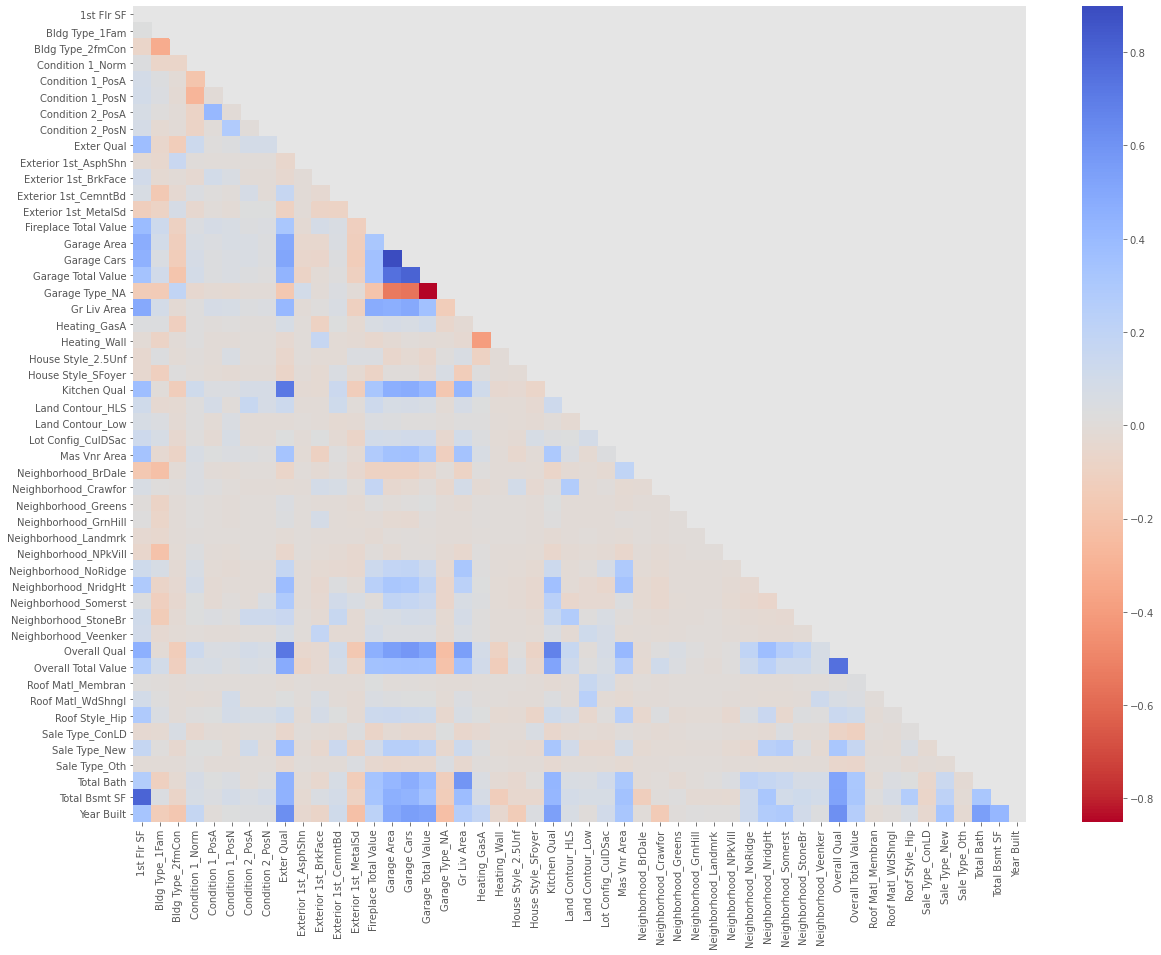

In [193]:
plt.figure(figsize= (20, 15))
mask = (np.triu(np.ones_like(df_train[coef_sort].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[coef_sort].corr(),
            annot=False, mask = mask, 
            fmt='.1g', cmap='coolwarm_r');

Very few patches of data with Correlation to each other, will plot out small heatmap to see

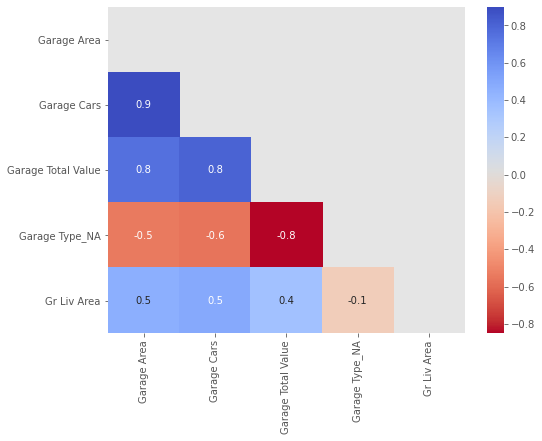

In [185]:
garage_coef = ['Garage Area','Garage Cars', 'Garage Total Value', 
               'Garage Type_NA', 'Gr Liv Area']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[garage_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[garage_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm_r');

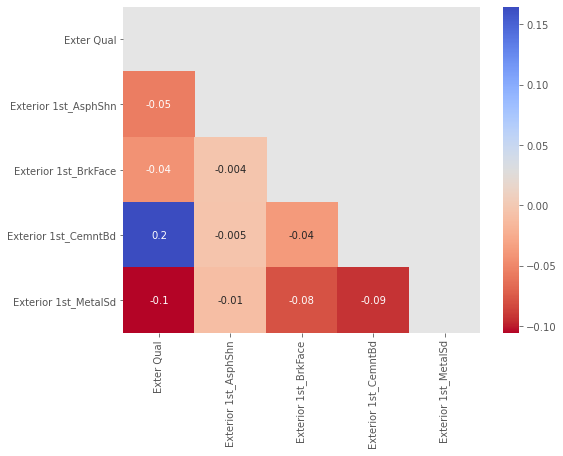

In [186]:
exterior_coef = ['Exter Qual','Exterior 1st_AsphShn','Exterior 1st_BrkFace',
               'Exterior 1st_CemntBd','Exterior 1st_MetalSd']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[exterior_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[exterior_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm_r');

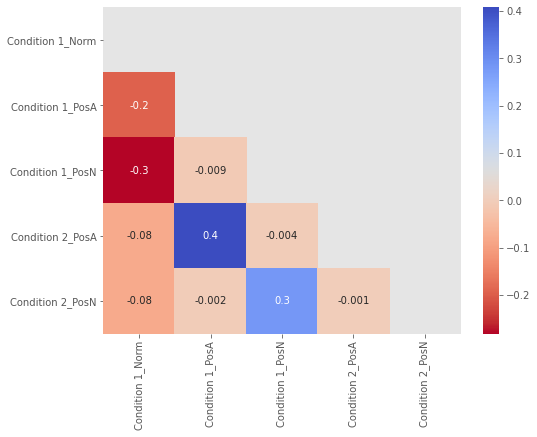

In [187]:
condition_coef = ['Condition 1_Norm','Condition 1_PosA','Condition 1_PosN',
                  'Condition 2_PosA','Condition 2_PosN']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[condition_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[condition_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm_r');

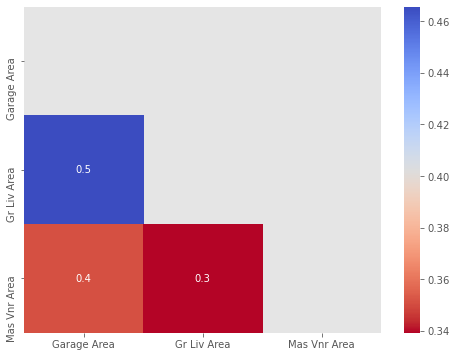

In [188]:
area_coef = ['Garage Area','Gr Liv Area','Mas Vnr Area']
plt.figure(figsize= (8, 6))
mask = (np.triu(np.ones_like(df_train[area_coef].corr(),
                             dtype=np.bool)))
sns.heatmap(df_train[area_coef].corr(),
            annot=True, mask = mask, 
            fmt='.1g', cmap='coolwarm_r');

# Initial Kaggle Submission

In [40]:
X_test = df_test[gd_coef]

In [41]:
test_predict = lasso.predict(X_test)

In [42]:
len(test_predict)

879

In [43]:
df_test.reset_index(inplace = True) # reseting index of test data

In [44]:
df_test.head()

,index,Id,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Fireplace Qu,Garage Finish,Garage Cars,Garage Area,Garage Total Value,Overall Total Value,Exter Total Value,Total Flr SF,Fireplace Total Value,Total Bath,Kitchen Total Value,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Condition 2_Artery,Condition 2_Feedr,Condition 2_Norm,Condition 2_PosA,Condition 2_PosN,Condition 2_RRAe,Condition 2_RRAn,Condition 2_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Roof Matl_CompShg,Roof Matl_Membran,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_PreCast,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,SalePrice
0,2000,2658,-0.054655,-2.029519,-1.637940,-0.585875,-0.688388,-1.659090,-0.048822,-0.656624,0.933686,0.815249,-2.306630,1.704956,-0.970362,-0.798453,-1.006544,-0.134118,-1.996029,1.428063,-2.181204,-0.656624,-0.983261,-0.457119,-0.839472,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2001,2718,-0.786525,0.191808,-0.342741,-0.585875,-0.688388,0.592393,2.267386,2.248968,1.015653,0.815249,-0.771543,2.362941,-0.970362,1.436594,0.327637,0.535649,0.752022,-1.606623,-0.703283,2.248968,-0.983261,-0.457119,0.696981,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2002,2414,0.677215,1.153278,1.048400,-0.585875,1.077984,0.592393,-0.943999,-1.326090,0.025740,0.815249,0.763545,0.388986,1.253899,0.319071,0.327637,-0.201095,0.359443,0.214188,0.774638,-1.326090,1.122682,1.714573,0.696981,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2003,1989,-0.786525,-1.598515,1.048400,-0.585875,1.077984,-0.533349,-0.176006

In [45]:
df_predicted = pd.DataFrame(test_predict, columns = ['SalePrice'])

In [46]:
df_predicted.head()

,SalePrice
0,132200.465839
1,162347.737004
2,210458.434589
3,112956.841153
4,181560.510432


In [47]:
submit = pd.concat([df_test['Id'], df_predicted['SalePrice']], 
                   ignore_index=False, sort=False, axis = 1)


In [48]:
submit.sort_values('Id', ascending = True, inplace = True)
submit.head()

,Id,SalePrice
704,2,102801.036226
706,4,289778.614749
120,6,191352.235537
312,7,226449.297049
401,17,191259.094130


In [49]:
submit.to_csv("../datasets/test_submit.csv", index=False)g